<a href="https://colab.research.google.com/github/CARRIEE-WU/AIProject/blob/master/cat_dog_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Dogs and Cats Classification**

## Connect to GitHub

In [1]:
!git clone https://github.com/a945120/AIProject.git

Cloning into 'AIProject'...
remote: Enumerating objects: 48, done.
remote: Counting objects: 100% (48/48), done.
remote: Compressing objects: 100% (46/46), done.
remote: Total 48 (delta 11), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (48/48), 317.55 KiB | 9.62 MiB/s, done.
Resolving deltas: 100% (11/11), done.


## Install Kaggle and Download Datasets

In [2]:
!pip install -q kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"carrieeee86","key":"08f7609e0dc4457990bffdb38191cf82"}'}

In [4]:
!mkdir ~/.kaggle

In [10]:
!cp kaggle.json ~/.kaggle/

In [11]:
!chmod 600 ~/.kaggle/kaggle.json

In [12]:
!kaggle datasets list

ref                                                  title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
sudarshan24byte/online-food-dataset                  Online Food Dataset                                  3KB  2024-03-02 18:50:30          12369        243  0.9411765        
syedanwarafridi/vehicle-sales-data                   Vehicle Sales Data                                  19MB  2024-02-21 20:16:17          20963        361  1.0              
bhavikjikadara/student-study-performance             Student Study Performance                            9KB  2024-03-07 06:14:09           6606        102  1.0              
julianoorlandi/spotify-top-songs-and-audio-features  Spotify Top Songs and Audio Features               526KB  2024-03-1

In [8]:
!kaggle datasets download -d shaunthesheep/microsoft-catsvsdogs-dataset

 99% 782M/788M [00:07<00:00, 115MB/s]
100% 788M/788M [00:07<00:00, 110MB/s]


In [ ]:
!unzip microsoft-catsvsdogs-dataset.zip

## Import Modules

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import os
#import tqdm
import random
from keras.preprocessing.image import load_img
warnings.filterwarnings('ignore')

## Create Dataframe for Input and Output

In [14]:
input_path = []
label = []

for class_name in os.listdir("PetImages"):
  for path in os.listdir("PetImages/" + class_name):
    if class_name == 'Cat':
      label.append(0)
    else:
      label.append(1)
    input_path.append(os.path.join("PetImages", class_name, path))
print(input_path[0], label[0])

PetImages/Cat/9761.jpg 0


In [22]:
df = pd.DataFrame()
df['images'] = input_path
df['label'] = label
df = df.sample(frac=1).reset_index(drop=True)
df.head()

images  label
0     PetImages/Cat/30.jpg      0
1  PetImages/Cat/11322.jpg      0
2   PetImages/Cat/1105.jpg      0
3   PetImages/Dog/6779.jpg      1
4    PetImages/Cat/555.jpg      0

## Exploratory Data Analysis

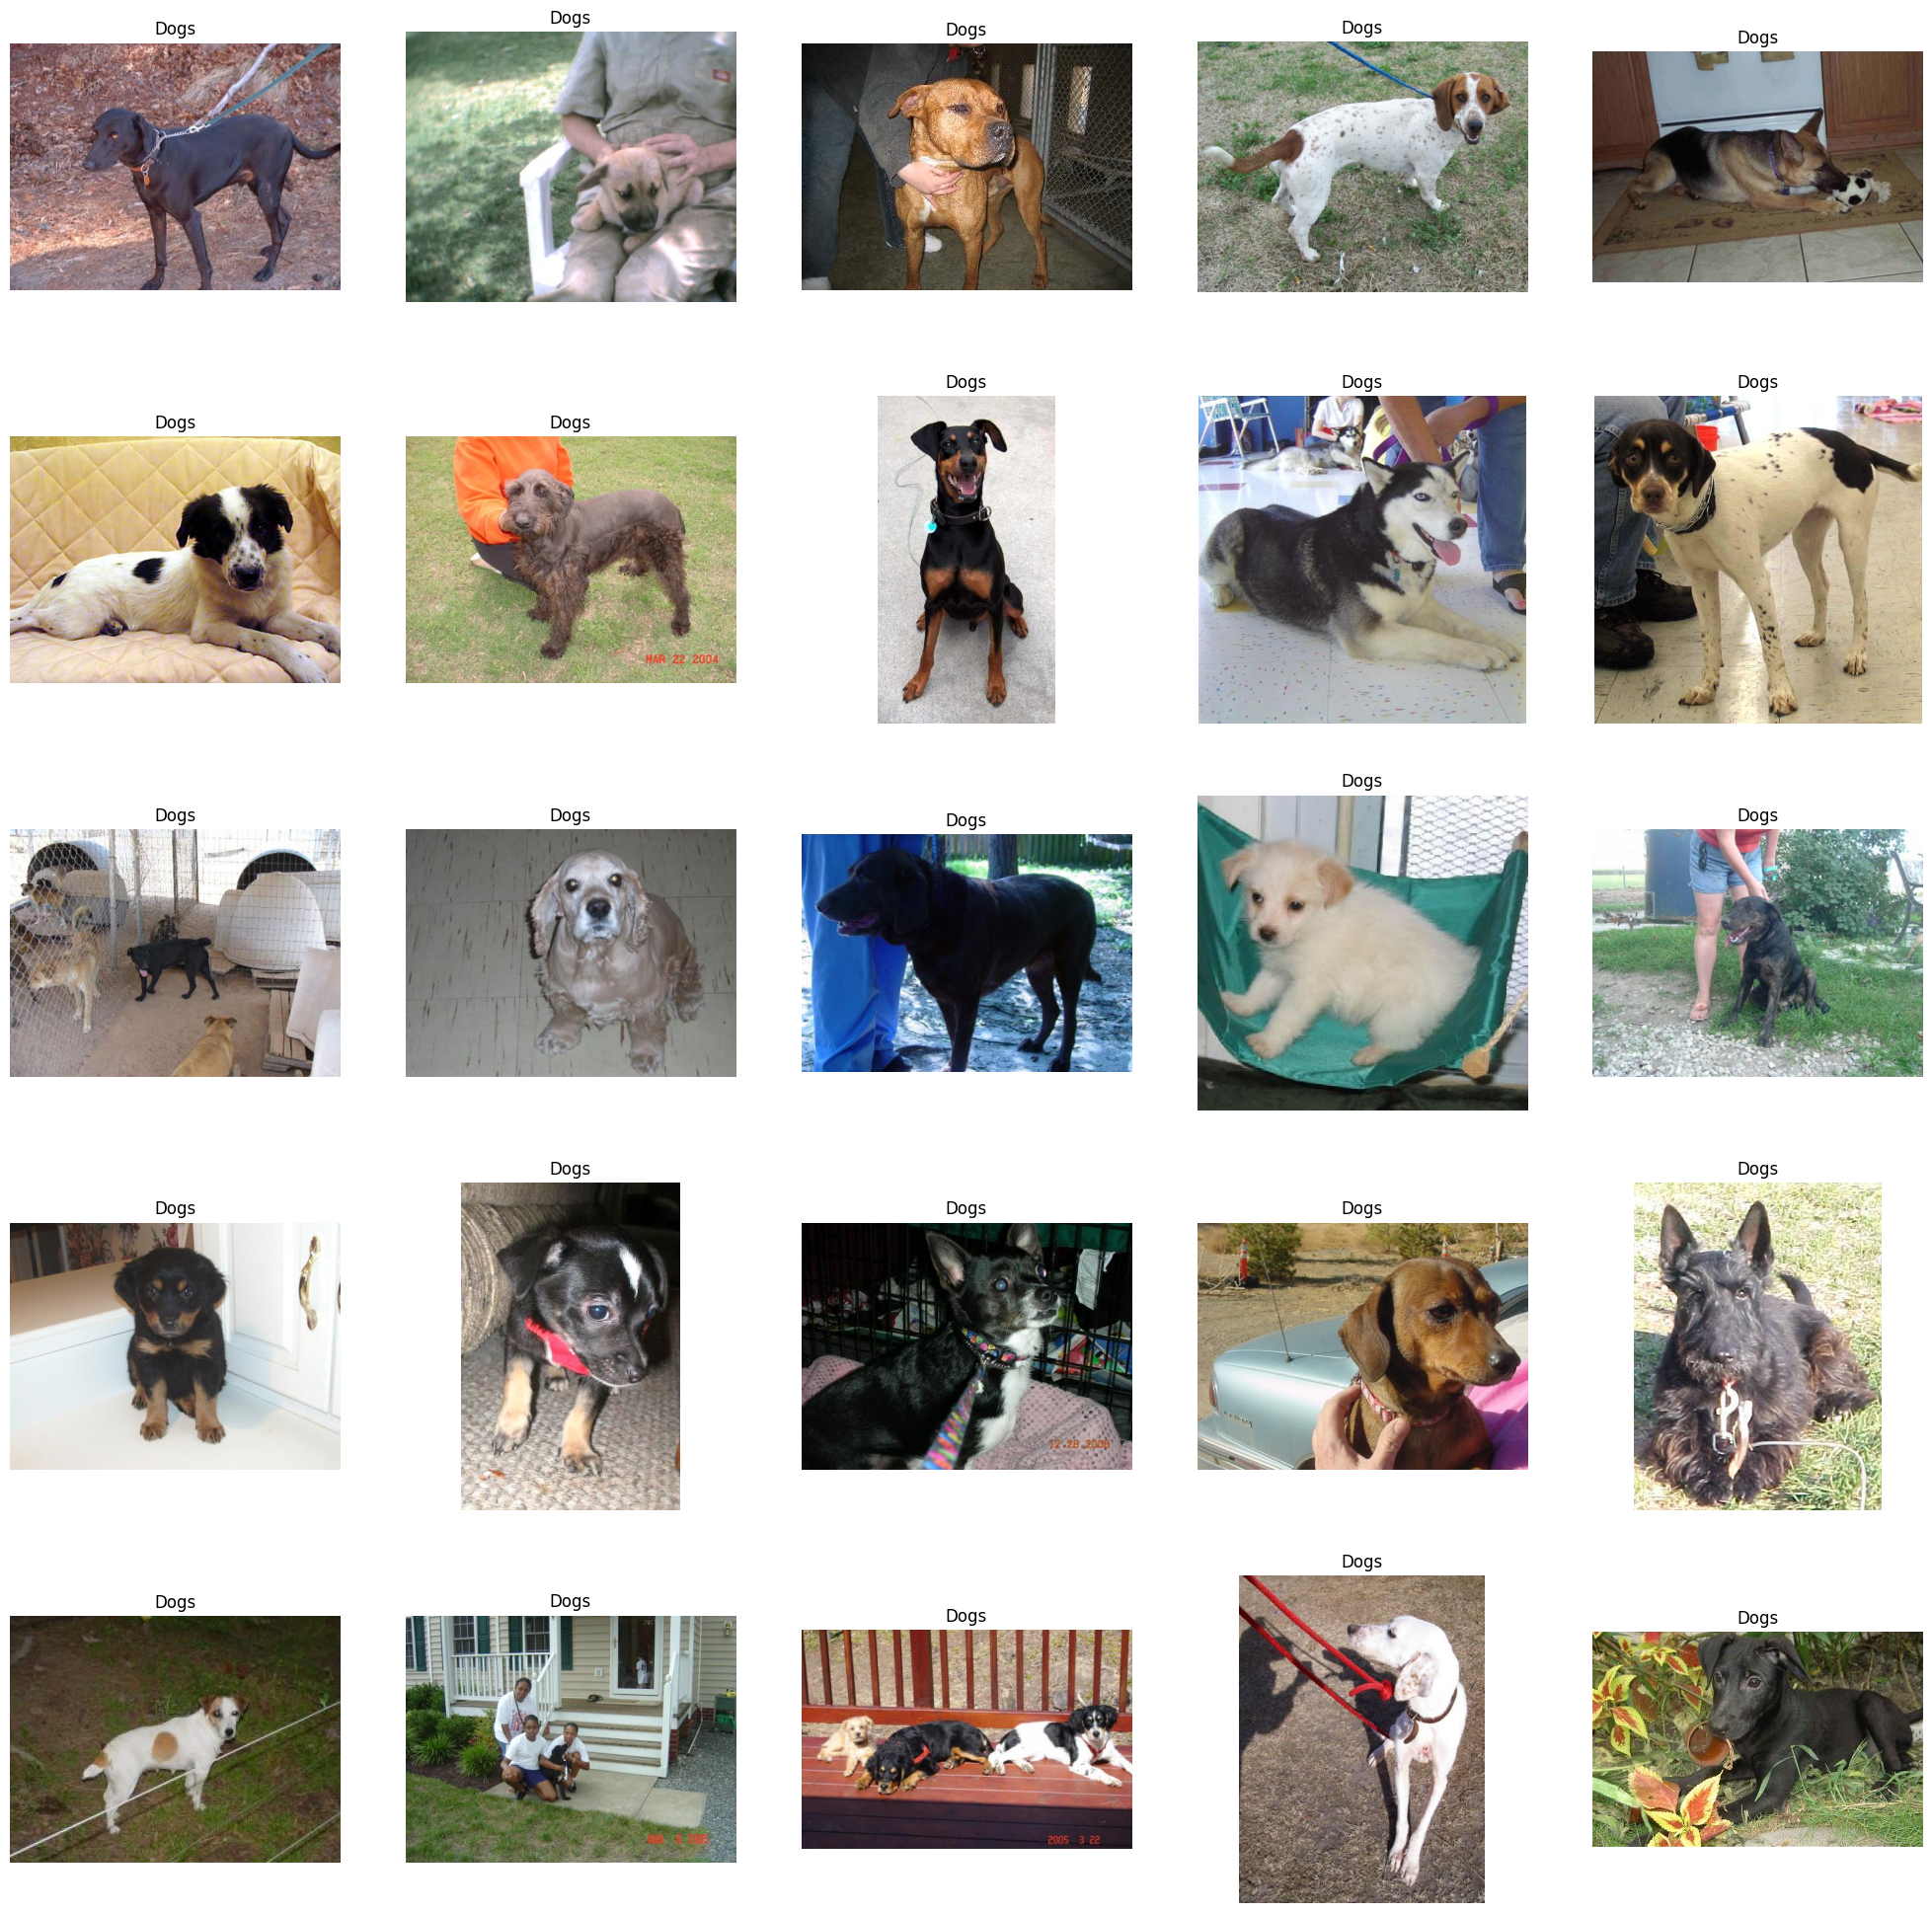

In [25]:
# To display grid of images
plt.figure(figsize=(25,25))
temp = df[df['label']==1]['images']
start = random.randint(0, len(temp))
files = temp[start:start+25]

for index, file in enumerate(files):
  plt.subplot(5, 5, index+1)
  img = load_img(file)
  img = np.array(img)
  plt.imshow(img)
  plt.title('Dogs')
  plt.axis('off')